# Python Final Projec : Seoul Bike Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn.pipeline import make_union

In [2]:
from flask import Flask

## Importing the data

### Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

### Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Variables and Target

The target here is the number of rented bike. All the other columns will be studied as variables.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [5]:
#seoul=pd.read_csv("sample_data/SeoulBikeData.csv", encoding='latin')
seoul=pd.read_csv("SeoulBikeData.csv", encoding='latin')
seoul.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## Identifying the data and NaN values

In [ ]:
seoul.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
seoul.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
print(seoul.isna().sum())
print("\nPourcentage des valeurs NA : ")
print((seoul.isna().sum() / len(seoul)) *100)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Pourcentage des valeurs NA : 
Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64


As we can see, we have no NA values to handle, and no null values either.

## Renaming the data

Let us rename our columns appropriately to facilitate our work later on:

In [6]:
seoul.columns = ['date', 'rented_bike_count', 'hour', 'temperature','humidity','wind_speed','visibility','dew_point_temperature','solar_radiation','rainfall','snowfall','seasons','holiday','functioning_day']
seoul.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  seasons     holiday functioning_day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [7]:
seoul['date']=pd.to_datetime(seoul['date'])
seoul.dtypes

date                     datetime64[ns]
rented_bike_count                 int64
hour                              int64
temperature                     float64
humidity                          int64
wind_speed                      float64
visibility                        int64
dew_point_temperature           float64
solar_radiation                 float64
rainfall                        float64
snowfall                        float64
seasons                          object
holiday                          object
functioning_day                  object
dtype: object

In [8]:
#seoul['year']=seoul.date.strftime('%Y-%m-%d').year
#seoul['month']=seoul.date.strftime('%Y-%m-%d').month
#seoul['day']=seoul.date.strftime('%Y-%m-%d').day
seoul['day'] = seoul.date.dt.day
seoul['month'] = seoul.date.dt.month
seoul['year'] = seoul.date.dt.year
seoul.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  seasons     holiday functioning_day  day  month  year  
0  Winter  No Holiday             Yes   12      1  2017  
1  Winter  No Holiday             Yes   12      1  2017  
2  Winter  No Holiday             Yes   12      1  2017  
3  Winter  No Holiday             Yes   12      1  2017  
4  Winter  No Holiday             Yes   12      1  2017

In [9]:
pd.unique(seoul[seoul.year==2017]['seasons'])

array(['Winter'], dtype=object)

We notices some dicreptencies between the seasons and the months (for instance, all rows from the year 2017 were marked as "Winter" regardless of the month). We therefore decided to redefine the seasons according to the official international calendar.


In [11]:
wi17=pd.date_range(start="2017-01-01",end="2017-03-20")
sp17=pd.date_range(start="2017-03-21",end="2017-06-20")
su17=pd.date_range(start="2017-06-21",end="2017-09-20")
au17=pd.date_range(start="2017-09-21",end="2017-12-20")

wi18=pd.date_range(start="2017-12-21",end="2018-03-20")
sp18=pd.date_range(start="2018-03-21",end="2018-06-20")
su18=pd.date_range(start="2018-06-21",end="2018-09-20")
au18=pd.date_range(start="2018-09-21",end="2018-12-31")

def fct_seasons(date_):
  season="Winter" if date_ in wi17 or date_ in wi18 else "Spring" if date_ in sp17 or date_ in sp18 else "Summer" if date_ in su17 or date_ in su18 else "Autumn"
  return season

seoul["seasons"]=[fct_seasons(seoul.loc[i, "date"]) for i in range(seoul.shape[0])]

pd.unique(seoul[seoul.year==2017]['seasons'])


array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

## Visualizing the data

### Global view of our numerical variables

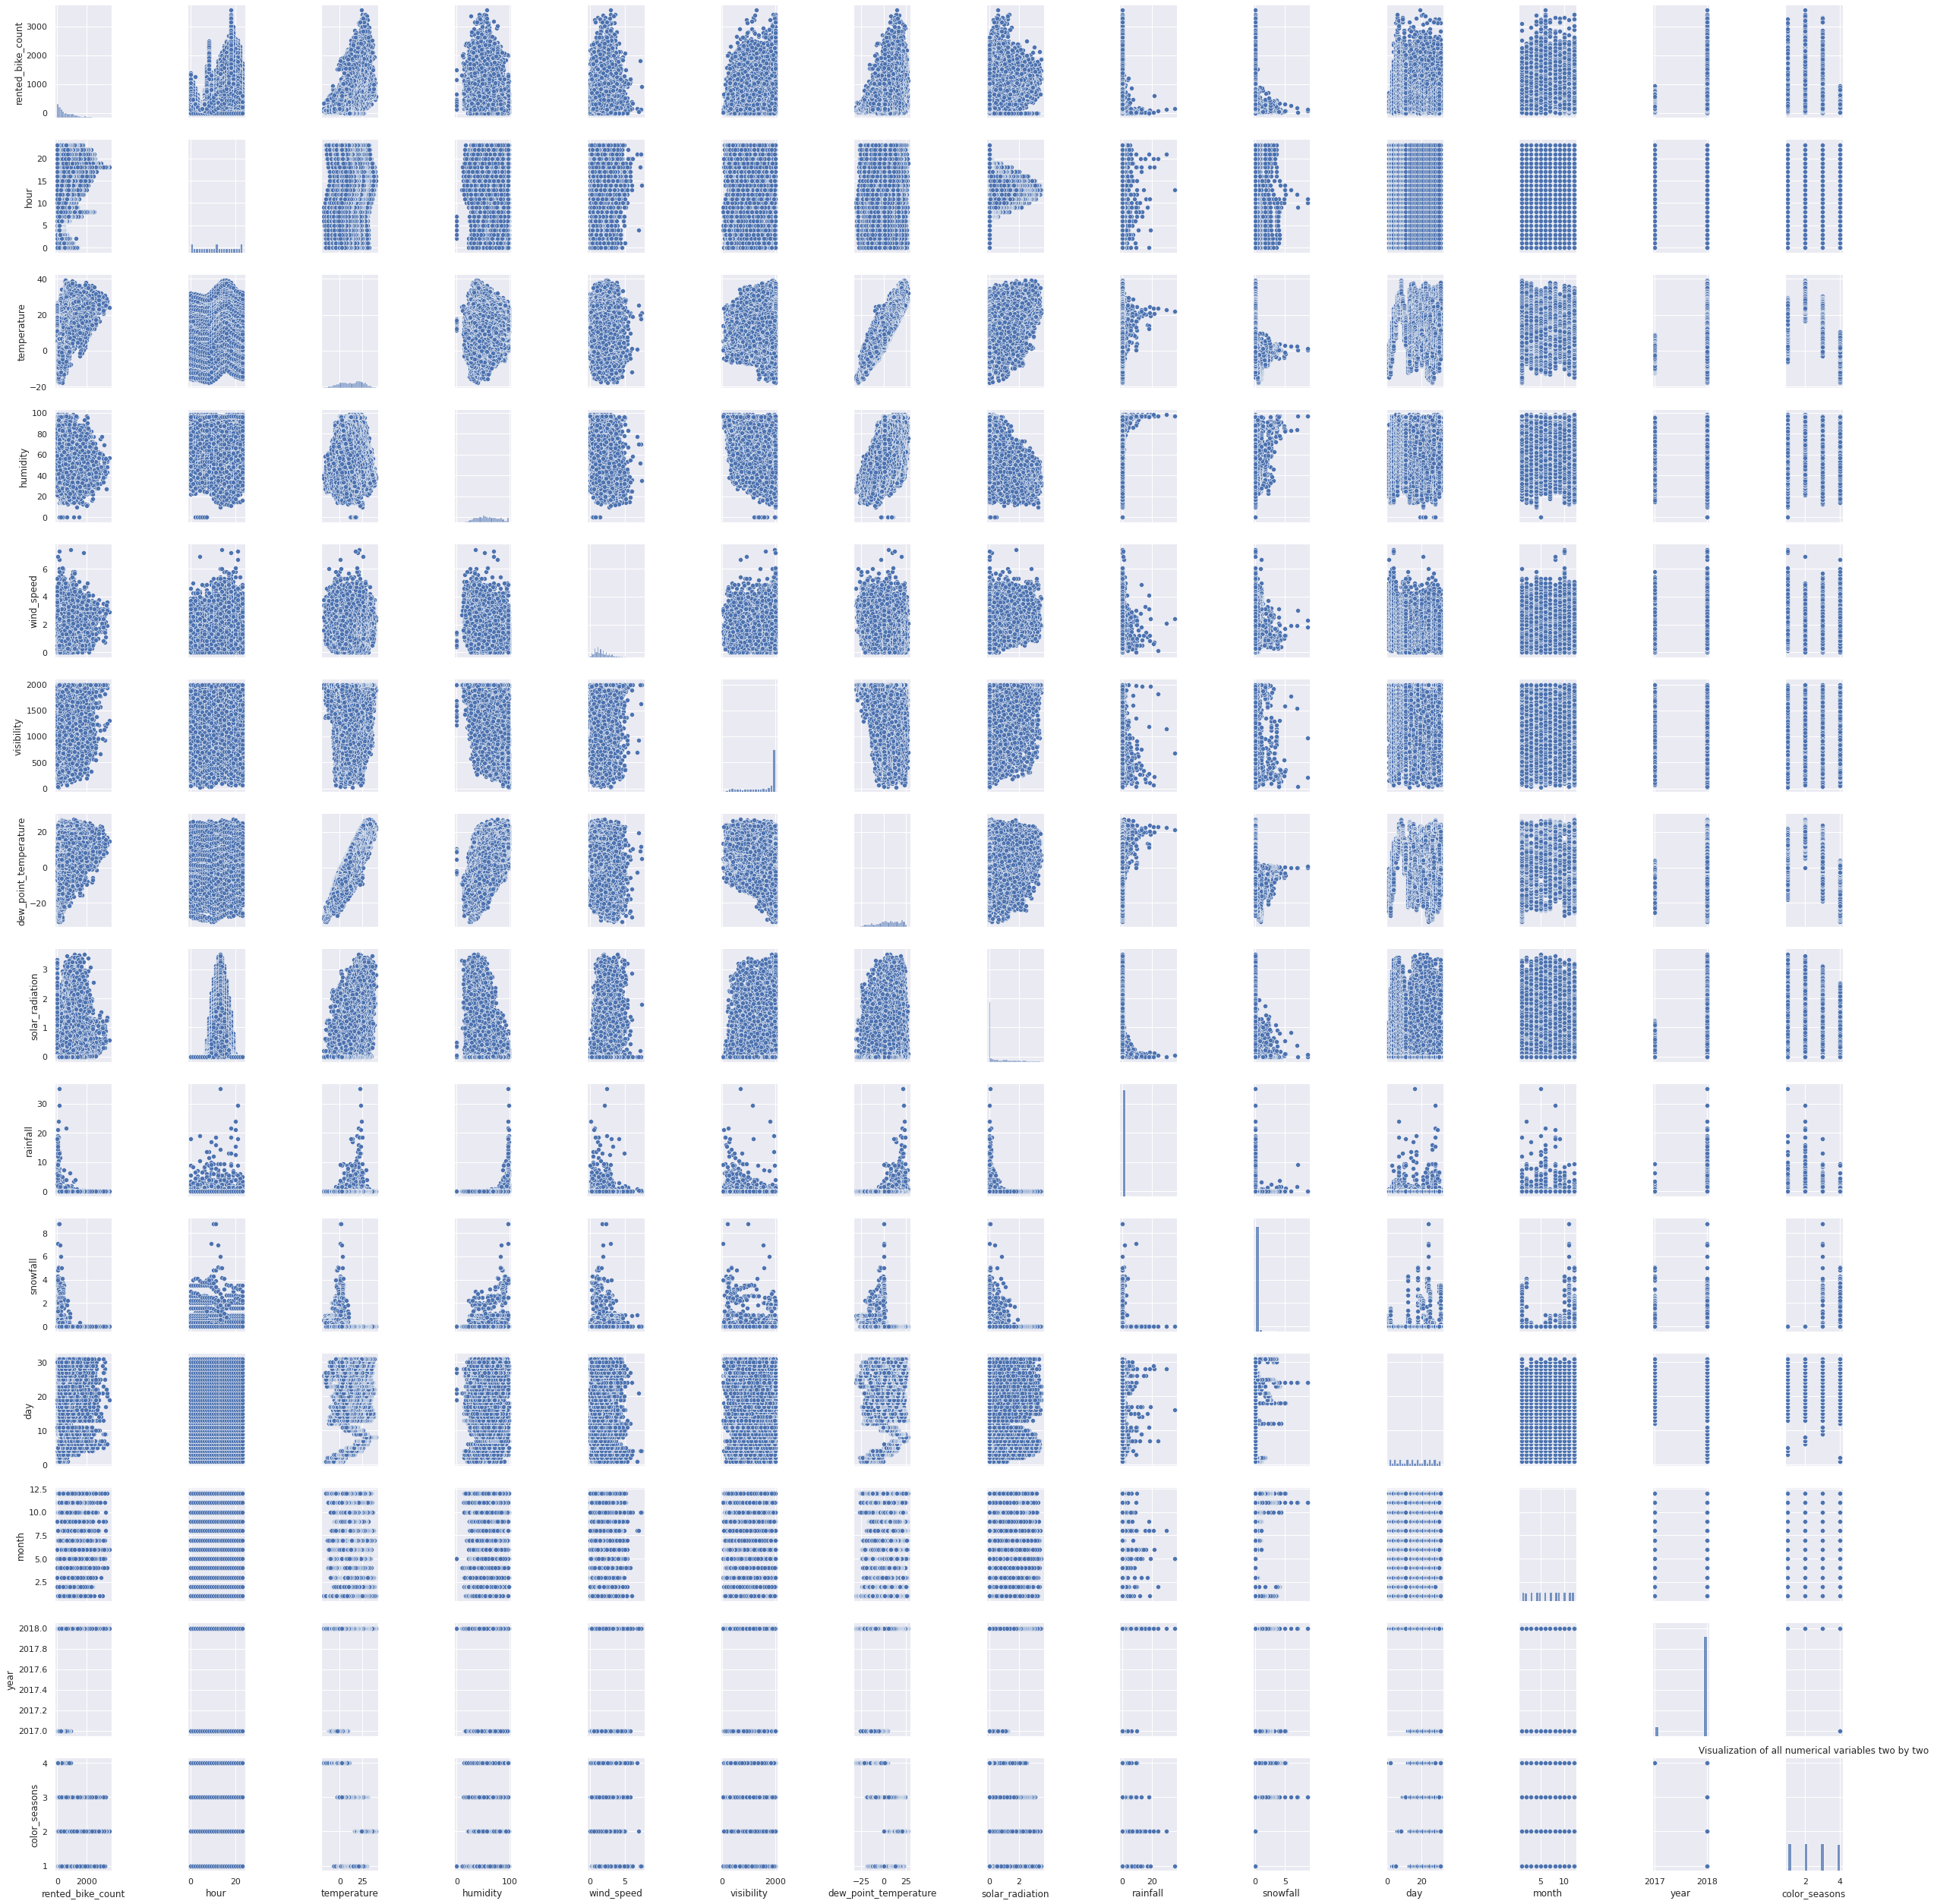

In [ ]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.pairplot(seoul)
plt.title("Visualization of all numerical variables two by two")
plt.tight_layout()
plt.show()

### Number of rented bikes throughout time :

<Figure size 2880x720 with 0 Axes>

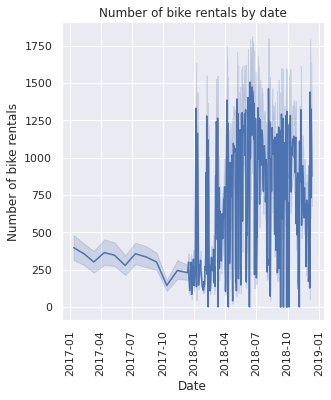

In [ ]:
plt.figure(figsize=(40,10))
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(4, 2)})
sns.relplot(data=seoul, x="date", y="rented_bike_count", kind='line')
plt.title("Number of bike rentals by date")
plt.xlabel("Date")
plt.ylabel("Number of bike rentals")
plt.tick_params(axis='x', rotation=90)
plt.show()

### Number of rented bikes depending on the year and month :

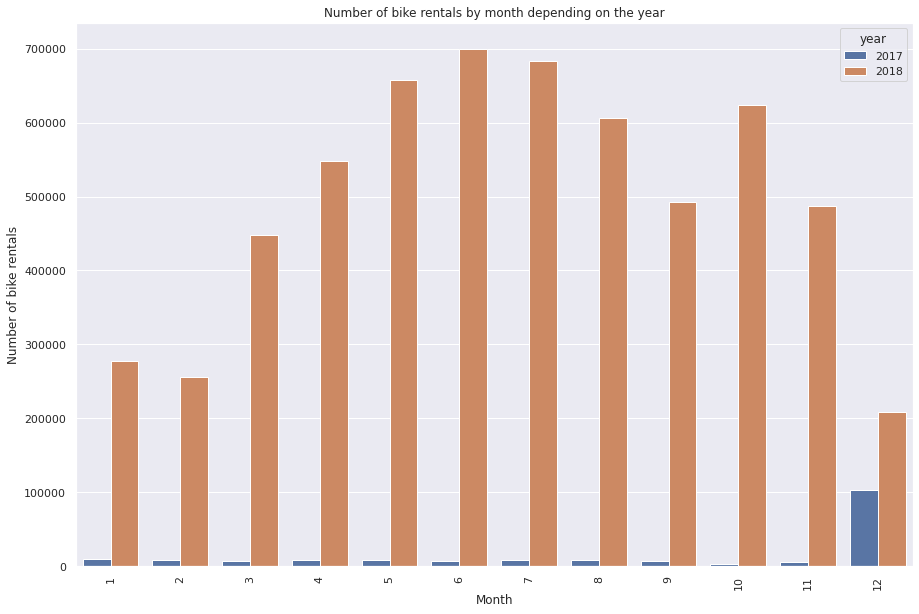

In [ ]:
plt.figure(figsize=(15,10))
seoul_years=pd.DataFrame(seoul.groupby(["year","month"])["rented_bike_count"].sum())
seoul_years.reset_index(inplace=True)

sns.barplot(data=seoul_years, x="month", y="rented_bike_count", hue="year")
plt.title("Number of bike rentals by month depending on the year")
plt.xlabel("Month")
plt.ylabel("Number of bike rentals")
plt.tick_params(axis='x', rotation=90)
plt.show()


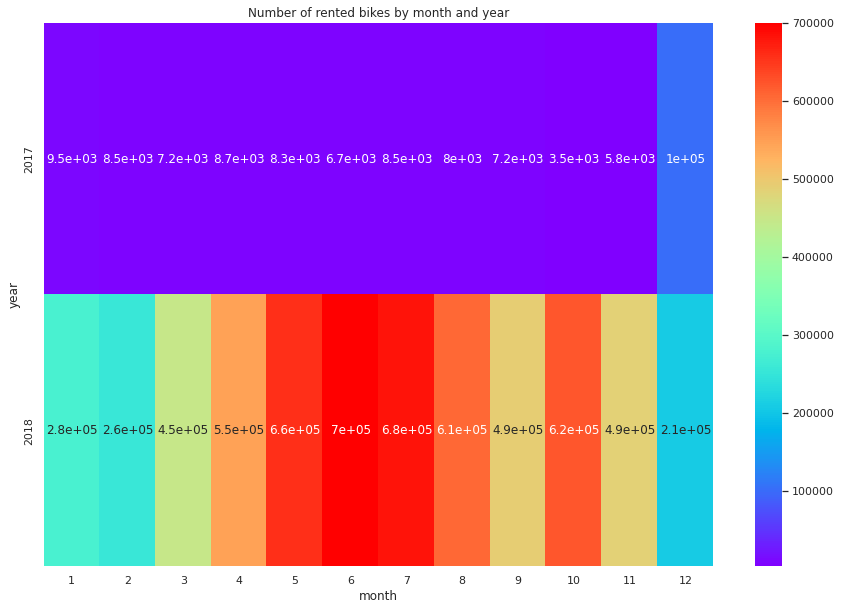

In [ ]:
location_years=seoul_years.pivot(index="year",columns= "month", values="rented_bike_count")
plt.figure(figsize=(15,10))
sns.heatmap(location_years,
                     annot=True,
                     cmap="rainbow")
plt.title("Number of rented bikes by month and year")
plt.xlabel("month")
plt.ylabel("year")
plt.show()

### Number of rented bikes depending on the month and day :

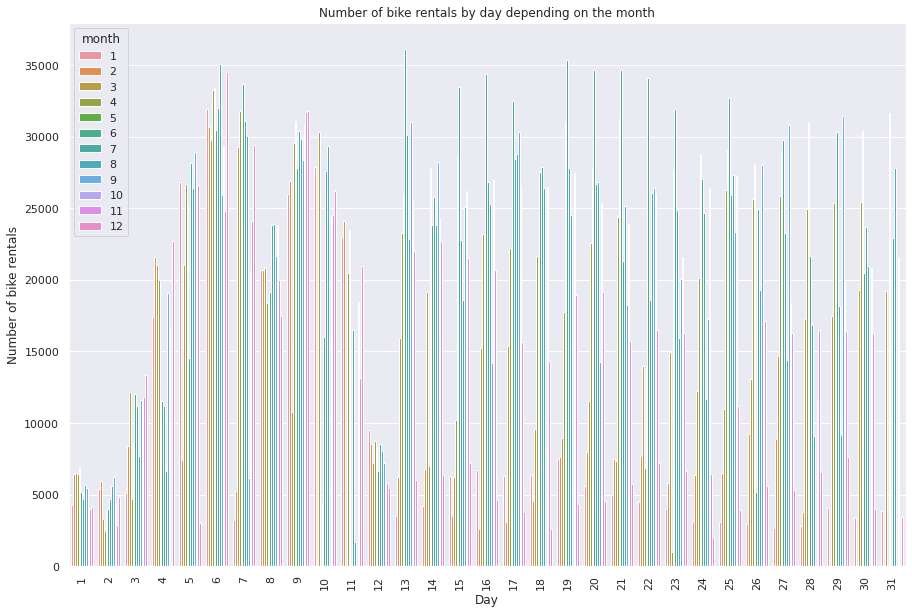

In [ ]:
plt.figure(figsize=(15,10))
seoul_months=pd.DataFrame(seoul.groupby(["month","day"])["rented_bike_count"].sum())
seoul_months.reset_index(inplace=True)

sns.barplot(data=seoul_months, x="day", y="rented_bike_count", hue="month")
plt.title("Number of bike rentals by day depending on the month")
plt.xlabel("Day")
plt.ylabel("Number of bike rentals")
plt.tick_params(axis='x', rotation=90)
plt.show()


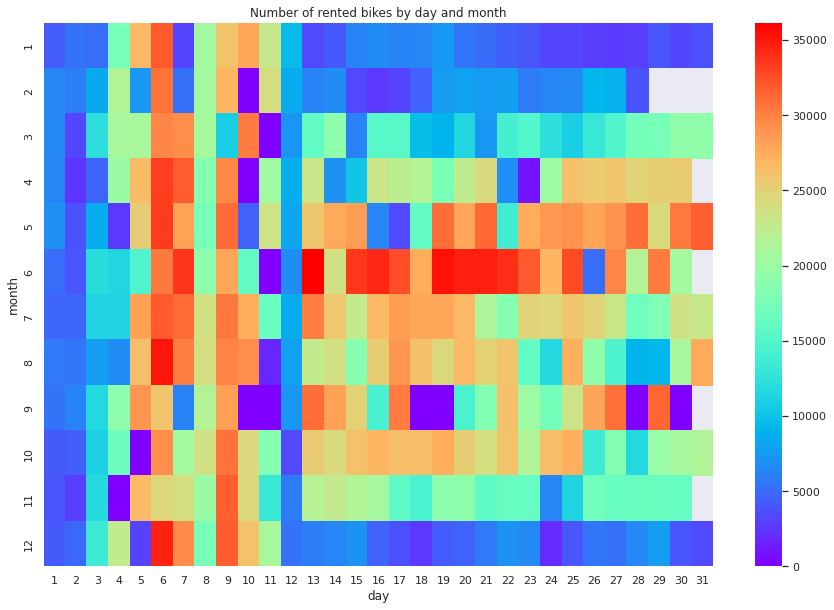

In [ ]:
location_years=seoul_months.pivot(index="month",columns= "day", values="rented_bike_count")
plt.figure(figsize=(15,10))
sb.heatmap(location_years,
                     annot=False,
                     cmap="rainbow")
plt.title("Number of rented bikes by day and month")
plt.xlabel("day")
plt.ylabel("month")
plt.show()

### Data repartition of rented bikes throughout time

In [ ]:
fig = px.sunburst(seoul, path=['year', 'month'], values='rented_bike_count', color='seasons')
fig.show()

In [ ]:
pd.unique(seoul[seoul.year==2017]['seasons'])

array(['Winter'], dtype=object)

In [ ]:
seoul[seoul.year==2017][['seasons', 'month', 'year']][100:200]

seasons  month  year
100  Winter      5  2017
101  Winter      5  2017
102  Winter      5  2017
103  Winter      5  2017
104  Winter      5  2017
..      ...    ...   ...
195  Winter      9  2017
196  Winter      9  2017
197  Winter      9  2017
198  Winter      9  2017
199  Winter      9  2017

[100 rows x 3 columns]

### Number of rented bikes depending of the season, then rainfall, snowfall and hour

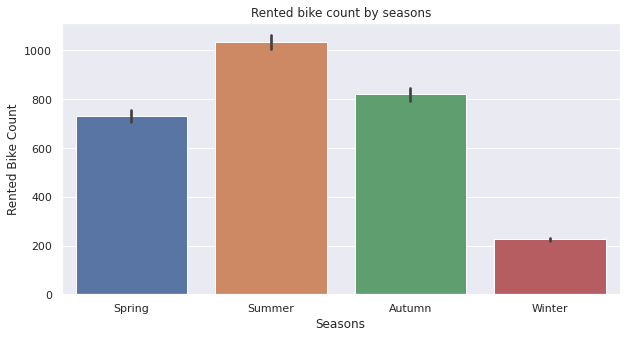

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.barplot(data=seoul,x="seasons", y="rented_bike_count", 
            order=["Spring", 'Summer', 'Autumn', 'Winter'])
plt.title("Rented bike count by seasons")
plt.xlabel("Seasons")
plt.ylabel("Rented Bike Count")
plt.show()

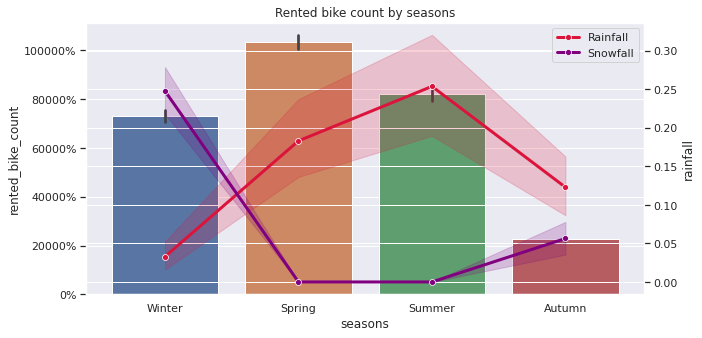

In [ ]:
ax = sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.barplot(data=seoul,x="seasons", y="rented_bike_count", 
            order=["Spring", 'Summer', 'Autumn', 'Winter'])
ax.yaxis.set_major_formatter(PercentFormatter(1))

ax2 = ax.twinx()

sns.lineplot(x='seasons', y='rainfall', data=seoul, marker='o', color='crimson', label="Rainfall", lw=3, ax=ax2)
sns.lineplot(x='seasons', y='snowfall', data=seoul, marker='o', color='purple', label="Snowfall", lw=3, ax=ax2)

plt.title("Rented bike count by seasons")
plt.legend()
plt.show()

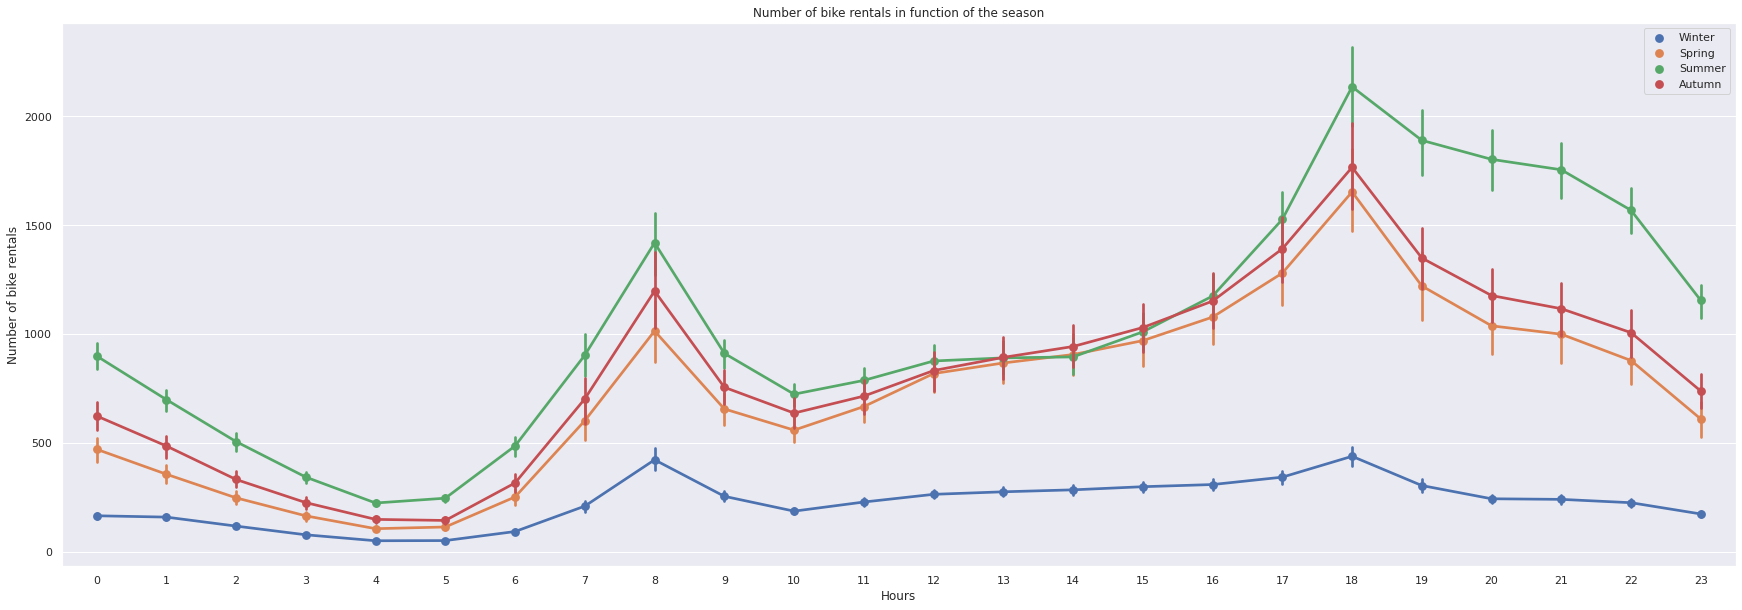

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=seoul, x="hour", y="rented_bike_count", hue="seasons")
              
plt.title("Number of bike rentals in function of the season")
plt.xlabel("Hours")
plt.ylabel("Number of bike rentals")
plt.legend()
plt.show()

### Number of rented bikes depending on the type of day (working day or not) and the hour

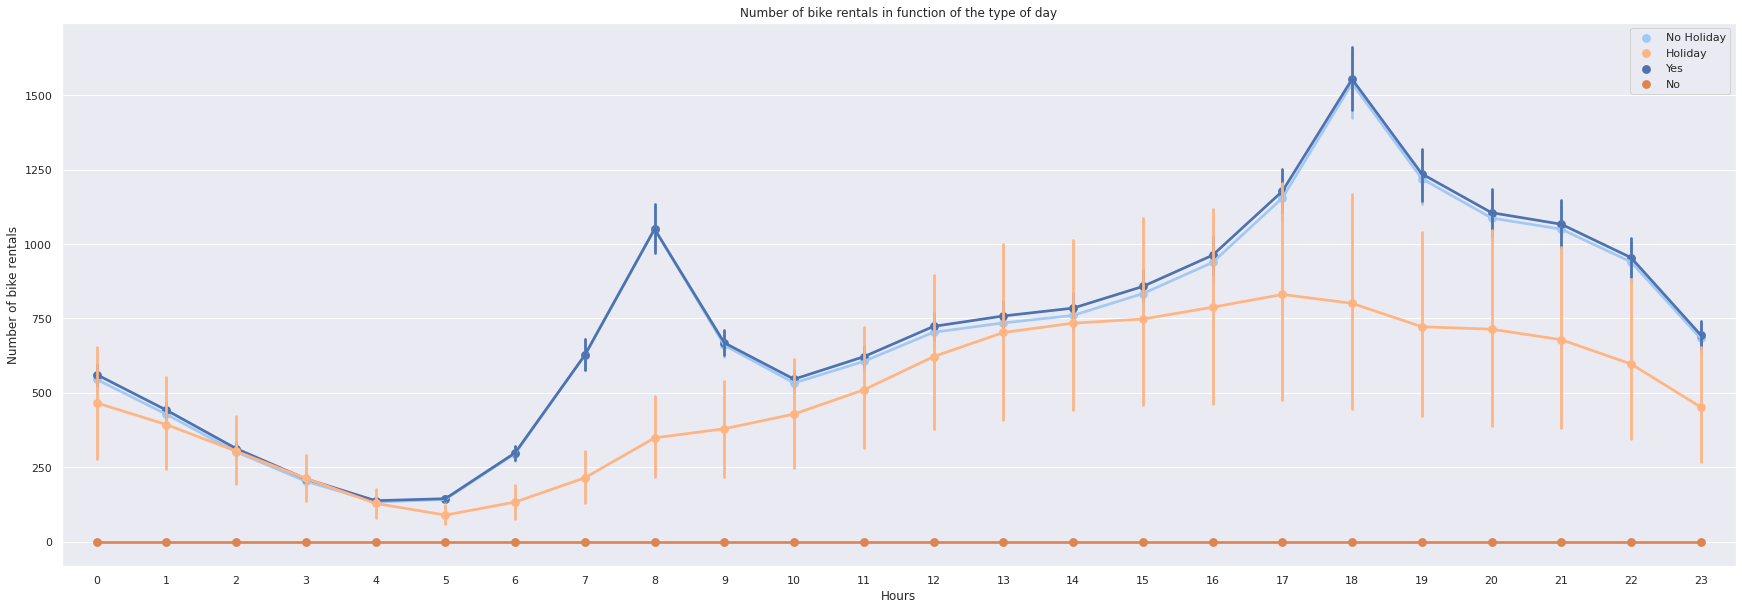

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=seoul, x="hour", y="rented_bike_count", hue="holiday", palette="pastel")
sns.pointplot(data=seoul, x="hour", y="rented_bike_count", hue="functioning_day")
              
plt.title("Number of bike rentals in function of the type of day")
plt.xlabel("Hours")
plt.ylabel("Number of bike rentals")
plt.legend()
plt.show()

### Number of rented bikes depending on the hour - moment of the day and the season

In [ ]:
seoul['Moment_of_day'] = ["Night" if x <= 5 else "Morning" if x <= 10
                          else "Noon" if x <= 14 else "Afternoon" if x <= 19 else "Evening" for x in seoul.hour]
seoul

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0    2017-01-12                254     0         -5.2        37         2.2   
1    2017-01-12                204     1         -5.5        38         0.8   
2    2017-01-12                173     2         -6.0        39         1.0   
3    2017-01-12                107     3         -6.2        40         0.9   
4    2017-01-12                 78     4         -6.0        36         2.3   
...         ...                ...   ...          ...       ...         ...   
8755 2018-11-30               1003    19          4.2        34         2.6   
8756 2018-11-30                764    20          3.4        37         2.3   
8757 2018-11-30                694    21          2.6        39         0.3   
8758 2018-11-30                712    22          2.1        41         1.0   
8759 2018-11-30                584    23          1.9        43         1.3   

      visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     seasons     holiday functioning_day  day  month  year  color_seasons  \
0     Winter  No Holiday             Yes   12      1  2017              4   
1     Winter  No Holiday             Yes   12      1  2017              4   
2     Winter  No Holiday             Yes   12      1  2017              4   
3     Winter  No Holiday             Yes   12      1  2017              4   
4     Winter  No Holiday             Yes   12      1  2017              4   
...      ...         ...             ...  ...    ...   ...            ...   
8755  Autumn  No Holiday             Yes   30     11  2018              3   
8756  Autumn  No Holiday             Yes   30     11  2018              3   
8757  Autumn  No Holiday             Yes   30     11  2018              3   
8758  Autumn  No Holiday             Yes   30     11  2018              3   
8759  Autumn  No Holiday             Yes   30     11  2018              3   

     Moment_of_day  
0            Night  
1            Night  
2            Night  
3            Night  
4            Night  
...            ...  
8755     Afternoon  
8756       Evening  
8757       Evening  
8758       Evening  
8759       Evening  

[8760 rows x 19 columns]

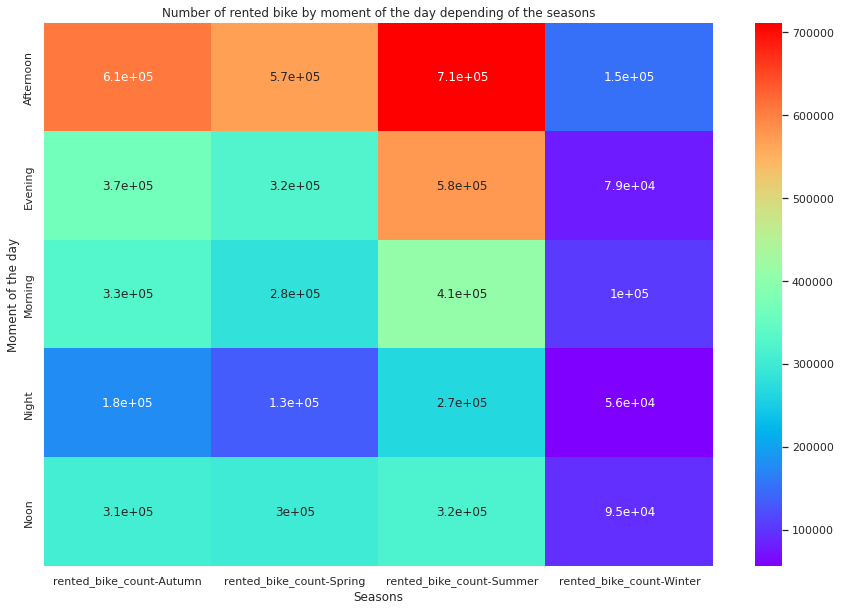

In [ ]:
plt.figure(figsize=(15,10))
seoul_heatmap = seoul.pivot_table(index=['Moment_of_day'],
                                      values = ['rented_bike_count'],
                                      columns=['seasons'],
                                      aggfunc='sum')

sns.heatmap(seoul_heatmap, annot=True, cmap="rainbow")

plt.title("Number of rented bike by moment of the day depending of the seasons")
plt.xlabel("Seasons")
plt.ylabel("Moment of the day")
plt.show()

### Number of rented bikes depending on weather

#### Temperature and seasons

In [ ]:
fig = px.histogram(seoul, x="temperature", y="rented_bike_count", color="seasons", marginal="rug",
                   hover_data=seoul.columns)
fig.show()

#### Humidity and temperature

In [ ]:
fig = px.histogram(seoul, x="humidity", y="rented_bike_count", color="seasons", marginal="rug",
                   hover_data=seoul.columns)
fig.show()

#### Wind speed

In [ ]:
fig = px.histogram(seoul, x="wind_speed", y="rented_bike_count", color="seasons", marginal="rug",
                   hover_data=seoul.columns)
fig.show()

#### Visiblity

In [ ]:
fig = px.histogram(seoul, x="visibility", y="rented_bike_count", color="seasons", marginal="rug",
                   hover_data=seoul.columns)
fig.show()

#### Dew point temperature

In [ ]:
fig = px.histogram(seoul, x="dew_point_temperature", y="rented_bike_count", color="seasons", marginal="rug",
                   hover_data=seoul.columns)
fig.show()

#### Solar radiation

In [ ]:
fig = px.histogram(seoul, x="solar_radiation", y="rented_bike_count", color="seasons", marginal="rug",
                   hover_data=seoul.columns)
fig.show()

#### Temperature, humidity and wind speed

In [ ]:
fig = px.scatter(seoul, x="rented_bike_count", y="temperature",
                 size="humidity", color="wind_speed",
                 hover_name=seoul.index, log_x=True, size_max=60, 
                 title="Scatterplot of ")
fig.show()

## Preprocessing the data

Let us normalize all the numerical variables as well as the target in order to put them on the same scale and simplify our study.

In [12]:
seoul[['rented_bike_count',"temperature", "humidity", "wind_speed", "visibility", "dew_point_temperature", "solar_radiation", "rainfall"]]=pd.DataFrame(MinMaxScaler().fit_transform(seoul[['rented_bike_count',"temperature", "humidity", "wind_speed", "visibility", "dew_point_temperature", "solar_radiation", "rainfall"]].to_numpy()))
seoul.head()


date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-01-12           0.071429     0     0.220280  0.377551    0.297297   
1 2017-01-12           0.057368     1     0.215035  0.387755    0.108108   
2 2017-01-12           0.048650     2     0.206294  0.397959    0.135135   
3 2017-01-12           0.030090     3     0.202797  0.408163    0.121622   
4 2017-01-12           0.021935     4     0.206294  0.367347    0.310811   

   visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0         1.0               0.224913              0.0       0.0       0.0   
1         1.0               0.224913              0.0       0.0       0.0   
2         1.0               0.223183              0.0       0.0       0.0   
3         1.0               0.224913              0.0       0.0       0.0   
4         1.0               0.207612              0.0       0.0       0.0   

  seasons     holiday functioning_day  day  month  year  
0  Winter  No Holiday             Yes   12      1  2017  
1  Winter  No Holiday             Yes   12      1  2017  
2  Winter  No Holiday             Yes   12      1  2017  
3  Winter  No Holiday             Yes   12      1  2017  
4  Winter  No Holiday             Yes   12      1  2017

In [13]:
seoul["seasons"]=pd.DataFrame(LabelEncoder().fit_transform(seoul["seasons"].to_numpy()))
seoul["holiday"]=pd.DataFrame(LabelEncoder().fit_transform(seoul["holiday"].to_numpy()))
seoul["functioning_day"]=pd.DataFrame(LabelEncoder().fit_transform(seoul["functioning_day"].to_numpy()))
seoul['hour']=pd.DataFrame(MinMaxScaler().fit_transform(seoul[['hour']].to_numpy()))
#seoul["Moment_of_day"]=pd.DataFrame(LabelEncoder().fit_transform(seoul["Moment_of_day"].to_numpy()))
seoul.head()

date  rented_bike_count      hour  temperature  humidity  wind_speed  \
0 2017-01-12           0.071429  0.000000     0.220280  0.377551    0.297297   
1 2017-01-12           0.057368  0.043478     0.215035  0.387755    0.108108   
2 2017-01-12           0.048650  0.086957     0.206294  0.397959    0.135135   
3 2017-01-12           0.030090  0.130435     0.202797  0.408163    0.121622   
4 2017-01-12           0.021935  0.173913     0.206294  0.367347    0.310811   

   visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0         1.0               0.224913              0.0       0.0       0.0   
1         1.0               0.224913              0.0       0.0       0.0   
2         1.0               0.223183              0.0       0.0       0.0   
3         1.0               0.224913              0.0       0.0       0.0   
4         1.0               0.207612              0.0       0.0       0.0   

   seasons  holiday  functioning_day  day  month  year  
0        3        1                1   12      1  2017  
1        3        1                1   12      1  2017  
2        3        1                1   12      1  2017  
3        3        1                1   12      1  2017  
4        3        1                1   12      1  2017

### Visualising the preprocessed data

In [14]:
seoul.corr()

rented_bike_count          hour  temperature  humidity  \
rented_bike_count               1.000000  4.102573e-01     0.538558 -0.199780   
hour                            0.410257  1.000000e+00     0.124114 -0.241644   
temperature                     0.538558  1.241145e-01     1.000000  0.159371   
humidity                       -0.199780 -2.416438e-01     0.159371  1.000000   
wind_speed                      0.121108  2.851967e-01    -0.036252 -0.336683   
visibility                      0.199280  9.875348e-02     0.034794 -0.543090   
dew_point_temperature           0.379788  3.054372e-03     0.912798  0.536894   
solar_radiation                 0.261837  1.451309e-01     0.353505 -0.461919   
rainfall                       -0.123074  8.714642e-03     0.050282  0.236397   
snowfall                       -0.141804 -2.151645e-02    -0.218405  0.108183   
seasons                        -0.150176 -3.163737e-16    -0.053342  0.003482   
holiday                         0.072338  6.916924e-17     0.055931  0.050278   
functioning_day                 0.203943  5.439377e-03    -0.050170 -0.020800   
day                             0.046849  2.052424e-16     0.080908  0.007047   
month                           0.070861  3.804767e-16     0.049683  0.047798   
year                            0.215162  2.312820e-14     0.377796  0.035925   

                       wind_speed  visibility  dew_point_temperature  \
rented_bike_count        0.121108    0.199280               0.379788   
hour                     0.285197    0.098753               0.003054   
temperature             -0.036252    0.034794               0.912798   
humidity                -0.336683   -0.543090               0.536894   
wind_speed               1.000000    0.171507              -0.176486   
visibility               0.171507    1.000000              -0.176630   
dew_point_temperature   -0.176486   -0.176630               1.000000   
solar_radiation          0.332274    0.149738               0.094381   
rainfall                -0.019674   -0.167629               0.125597   
snowfall                -0.003554   -0.121695              -0.150887   
seasons                  0.042697   -0.044540              -0.044372   
holiday                 -0.023017   -0.031773               0.066759   
functioning_day          0.005037   -0.026000              -0.052837   
day                     -0.061234   -0.106859               0.069708   
month                   -0.082069    0.077888               0.065101   
year                    -0.003781    0.052381               0.336350   

                       solar_radiation  rainfall  snowfall       seasons  \
rented_bike_count             0.261837 -0.123074 -0.141804 -1.501757e-01   
hour                          0.145131  0.008715 -0.021516 -3.163737e-16   
temperature                   0.353505  0.050282 -0.218405 -5.334220e-02   
humidity                     -0.461919  0.236397  0.108183  3.482324e-03   
wind_speed                    0.332274 -0.019674 -0.003554  4.269682e-02   
visibility                    0.149738 -0.167629 -0.121695 -4.454045e-02   
dew_point_temperature         0.094381  0.125597 -0.150887 -4.437232e-02   
solar_radiation               1.000000 -0.074290 -0.072301 -3.253887e-02   
rainfall                     -0.074290  1.000000  0.008500  1.649074e-02   
snowfall                     -0.072301  0.008500  1.000000 -9.780981e-03   
seasons                      -0.032539  0.016491 -0.009781  1.000000e+00   
holiday                       0.005077  0.014269  0.012591 -1.370975e-01   
functioning_day              -0.007665  0.002055  0.032089  2.855732e-02   
day                          -0.003446  0.011998  0.101435 -5.148260e-03   
month                        -0.030412 -0.022794  0.054758 -6.333667e-01   
year                          0.128086  0.027522 -0.206418 -4.080968e-02   

                            holiday  functioning_day           day  \
rented_bike_count      7.233757e-02         0.203943  4.6

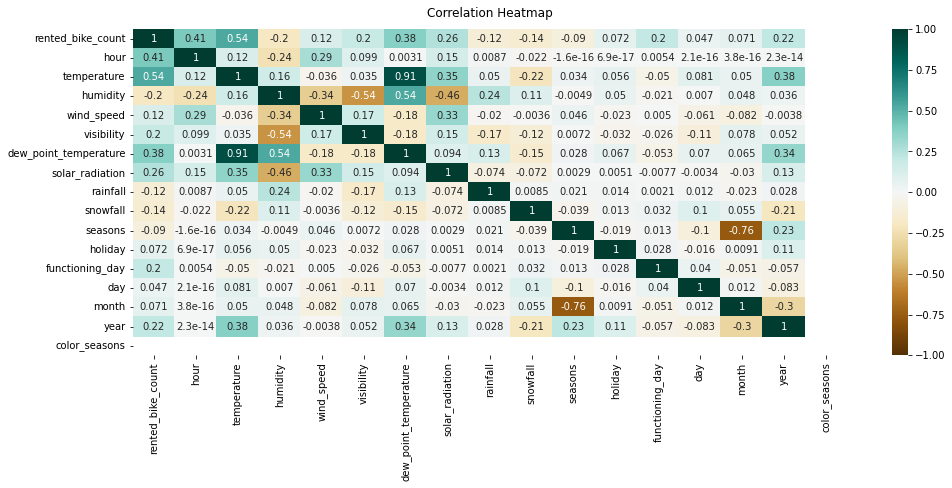

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(seoul.corr(), vmin=-1, vmax=1, cmap="BrBG", annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Creating models

Firstly, we will separate our data into a train and a test group.

In [27]:
from sklearn.model_selection import train_test_split
#(seoul_train, seoul_test,bike_train, bike_test) = train_test_split(seoul.loc[:, seoul.columns != 'rented_bike_count'], seoul.rented_bike_count)
(seoul_train, seoul_test,bike_train, bike_test) = train_test_split(seoul[["temperature", "hour"]], seoul.rented_bike_count)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def KNN(k):
  {
      
  }
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model
knn.fit(seoul_train, bike_train)

#Predict our target
bike_pred_knn = knn.predict(seoul_test)
bike_pred_knn

#Accuracy of the model
print("Accuracy:",metrics.accuracy_score(bike_test, bike_pred_knn))
#print("Accuracy:",knn.score(seoul_test, bike_test))

#KNN éclaté au sol de 1%

SyntaxError: ignored

In [34]:
from sklearn import linear_model 
reg = linear_model.LinearRegression()
reg.fit(seoul_train, bike_train) 
bike_pred_reg= reg.predict(seoul_test) 


In [33]:
#from sklearn.metrics import accuracy_score
print(f"Variance Score={reg.score(seoul_test, bike_test)}")

Variance Score=0.4142532341203675
